In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
# Use the print() function to display the latitude and longitude combinations.
for coordinate in coordinates:
    print(coordinate[0], coordinate[1])

-7.015509869814707 151.11056660175836
5.131219794024219 22.448260100741237
44.78155312390737 168.04781441348018
64.55256165584228 -119.35856180081316
74.22519123798591 -176.32447710211542
18.45740827005396 64.06802433832641
20.978410793611346 35.82566349435899
68.12959884585655 -67.78374298166685
59.7785998983378 118.86774176067928
4.07207193674023 -53.682496384160146
2.0859713649166736 83.74706117524767
-7.624206179033678 -77.5676810946582
52.429447722446895 88.69957153081424
-16.103869403633297 146.65244198237843
-73.64116111012282 79.71759812936779
-15.839244199522156 55.751446741997
89.17803690031604 -110.09529312251493
61.13573864365782 -24.545781505237414
-74.92419868399237 70.77151415019651
-20.302241030819886 107.36837304707609
84.81889560157754 161.5956370054268
60.03457922486197 135.56950624080486
-77.18660725488094 -130.9592979591965
21.96819353404163 78.47951143495749
24.15901916495416 101.27745808249574
39.172596243462664 1.6837427490975472
-38.8636589823612 62.85121324250

-83.9317858758088 -171.54320489035547
51.28665832963577 -0.7523771636089691
-48.34606633649835 168.07606059126277
20.375524481725378 26.20836706607733
25.140167694379087 -14.674281922779414
83.62720085522815 119.66381933824323
-78.0161404333022 127.33205974768151
35.43281639049246 -91.54922782408656
-81.56847315693875 23.865784667862528
4.726815126284222 111.24854906458927
68.99629565649462 57.5996225664492
67.77135423169145 170.6512095968332
-26.327494182135908 67.37272836995044
37.69514560702075 167.2779474143441
44.17151436572985 67.13887940530421
-57.786666377445535 12.940449384025158
-13.344738061439656 4.395557204550585
-88.99363316498986 -64.17737678034261
-51.80147850708748 72.21573297631764
68.48421505319993 114.90132561881933
12.816391624304899 -90.7339082585702
29.035700377564964 -130.5465450099288
-46.12526168519519 -14.887495231919473
-19.035668417680824 -83.37450956110999
45.63465724633076 37.67253514996676
39.65174373417784 63.24630227071637
9.509039712864336 134.7684477

In [5]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [6]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

594

In [7]:
import requests
requests.__version__

'2.27.1'

In [8]:
# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

In [9]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

# Import the datetime module from the datetime library.
from datetime import datetime

In [10]:
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [11]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

Beginning Data Retrieval     
-----------------------------


In [12]:
# Loop through all the cities in our list.
for i in range(len(cities)):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + cities[i]

In [13]:
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Processing Record 1 of Set 12 | kimbe
Processing Record 2 of Set 12 | gambo
Processing Record 3 of Set 12 | nikolskoye
Processing Record 4 of Set 12 | hay river
Processing Record 5 of Set 12 | mys shmidta
City not found. Skipping...
Processing Record 6 of Set 12 | sur
Processing Record 7 of Set 12 | sinkat
City not found. Skipping...
Processing Record 8 of Set 12 | clyde river
Processing Record 9 of Set 12 | suntar
Processing Record 10 of Set 12 | grand-santi
Processing Record 11 of Set 12 | hambantota
Processing Record 12 of Set 12 | pucara
Processing Record 13 of Set 12 | sheregesh
Processing Record 14 of Set 12 | cairns
Processing Record 15 of Set 12 | busselton
Processing Record 16 of Set 12 | cap malheureux
Processing Record 17 of Set 12 | yellowknife
Processing Record 18 of Set 12 | grindavik
Processing Record 19 of Set 12 | taolanaro
City not found. Skipping...
Processing Record 20 of Set 12 | carnarvon
Processing Record 21 of Set 12 | cherskiy
Processing Record 22 of Set 12 | e

Processing Record 35 of Set 15 | batemans bay
Processing Record 36 of Set 15 | menongue
Processing Record 37 of Set 15 | lompoc
Processing Record 38 of Set 15 | ekibastuz
Processing Record 39 of Set 15 | saleaula
City not found. Skipping...
Processing Record 40 of Set 15 | nizwa
Processing Record 41 of Set 15 | tazovskiy
Processing Record 42 of Set 15 | payo
Processing Record 43 of Set 15 | gidam
Processing Record 44 of Set 15 | yushu
Processing Record 45 of Set 15 | vestmannaeyjar
Processing Record 46 of Set 15 | tiksi
Processing Record 47 of Set 15 | zaraza
Processing Record 48 of Set 15 | codrington
Processing Record 49 of Set 15 | ponta do sol
Processing Record 50 of Set 15 | severnyy
Processing Record 1 of Set 16 | banepa
Processing Record 2 of Set 16 | plouzane
Processing Record 3 of Set 16 | pirapo
Processing Record 4 of Set 16 | sentyabrskiy
City not found. Skipping...
Processing Record 5 of Set 16 | wilmington
Processing Record 6 of Set 16 | bud
Processing Record 7 of Set 16 |

Processing Record 20 of Set 19 | zhanakorgan
Processing Record 21 of Set 19 | namibe
Processing Record 22 of Set 19 | udachnyy
Processing Record 23 of Set 19 | san jose
Processing Record 24 of Set 19 | pacific grove
Processing Record 25 of Set 19 | pisco
Processing Record 26 of Set 19 | chernoyerkovskaya
Processing Record 27 of Set 19 | seydi
Processing Record 28 of Set 19 | pochutla
Processing Record 29 of Set 19 | wageningen
Processing Record 30 of Set 19 | bailieborough
Processing Record 31 of Set 19 | yunjinghong
City not found. Skipping...
Processing Record 32 of Set 19 | sarai sidhu
Processing Record 33 of Set 19 | tucurui
Processing Record 34 of Set 19 | zhangzhou
Processing Record 35 of Set 19 | erzin
Processing Record 36 of Set 19 | sawang daen din
Processing Record 37 of Set 19 | chokurdakh
Processing Record 38 of Set 19 | edson
Processing Record 39 of Set 19 | uray
Processing Record 40 of Set 19 | pachino
Processing Record 41 of Set 19 | vardo
Processing Record 42 of Set 19 

Processing Record 5 of Set 23 | adrar
Processing Record 6 of Set 23 | laguna
Processing Record 7 of Set 23 | alagoinhas
Processing Record 8 of Set 23 | goderich
Processing Record 9 of Set 23 | lokoja
Processing Record 10 of Set 23 | binzhou
Processing Record 11 of Set 23 | makakilo city
Processing Record 12 of Set 23 | pringsewu
Processing Record 13 of Set 23 | palana
Processing Record 14 of Set 23 | nanortalik
Processing Record 15 of Set 23 | eenhana
Processing Record 16 of Set 23 | bandarbeyla
Processing Record 17 of Set 23 | santa cruz
Processing Record 18 of Set 23 | kankakee
Processing Record 19 of Set 23 | play cu
City not found. Skipping...
Processing Record 20 of Set 23 | owase
Processing Record 21 of Set 23 | grand gaube
Processing Record 22 of Set 23 | vostok
Processing Record 23 of Set 23 | meybod
Processing Record 24 of Set 23 | wodonga
Processing Record 25 of Set 23 | haibowan
City not found. Skipping...
Processing Record 26 of Set 23 | ati
Processing Record 27 of Set 23 |

In [14]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Kimbe,-5.5502,150.1429,75.36,91,33,4.34,PG,2022-07-06 20:59:05
1,Gambo,4.6482,22.2633,69.51,95,5,2.13,CF,2022-07-06 20:59:05
2,Nikolskoye,59.7035,30.7861,64.80,75,100,2.26,RU,2022-07-06 20:59:06
3,Hay River,60.8156,-115.7999,80.58,28,75,10.36,CA,2022-07-06 20:59:06
4,Sur,22.5667,59.5289,84.99,77,100,11.01,OM,2022-07-06 20:59:06
5,Clyde River,70.4692,-68.5914,50.23,62,20,10.36,CA,2022-07-06 20:59:07
6,Suntar,62.1444,117.6319,59.11,88,100,3.60,RU,2022-07-06 20:59:07
7,Grand-Santi,4.2500,-54.3833,78.28,92,60,3.22,GF,2022-07-06 20:59:08
8,Hambantota,6.1241,81.1185,80.28,77,100,15.03,LK,2022-07-06 20:59:08
9,Pucara,-15.9803,-71.4606,44.73,27,8,10.40,PE,2022-07-06 20:59:08


In [16]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]

In [17]:
city_data_df = city_data_df[new_column_order]

In [18]:
city_data_df

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Kimbe,PG,2022-07-06 20:59:05,-5.5502,150.1429,75.36,91,33,4.34
1,Gambo,CF,2022-07-06 20:59:05,4.6482,22.2633,69.51,95,5,2.13
2,Nikolskoye,RU,2022-07-06 20:59:06,59.7035,30.7861,64.80,75,100,2.26
3,Hay River,CA,2022-07-06 20:59:06,60.8156,-115.7999,80.58,28,75,10.36
4,Sur,OM,2022-07-06 20:59:06,22.5667,59.5289,84.99,77,100,11.01
...,...,...,...,...,...,...,...,...,...
542,Xihe,CN,2022-07-06 21:13:21,31.6864,113.4659,75.06,90,5,0.45
543,Kuryk,KZ,2022-07-06 21:13:21,43.2000,51.6500,71.58,44,0,8.88
544,Kedrovyy,RU,2022-07-06 21:13:21,56.1667,91.8167,57.87,99,100,3.47
545,Sarkand,KZ,2022-07-06 21:13:22,45.4100,79.9186,63.52,30,0,7.18


In [19]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [20]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

In [21]:
# Import the time module.
import time
# Get today's date in seconds.
today = time.time()
today

1657157822.469767

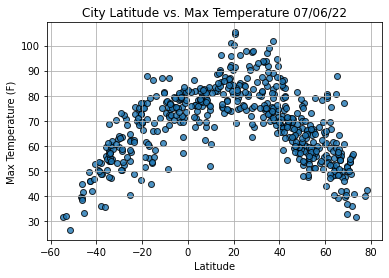

In [22]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

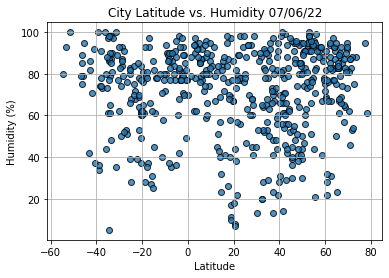

In [23]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

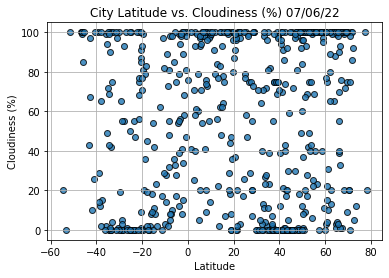

In [24]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

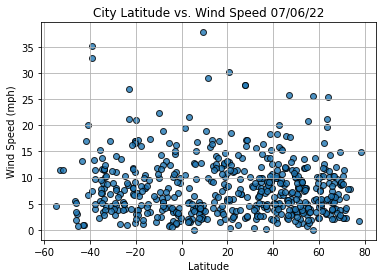

In [25]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()